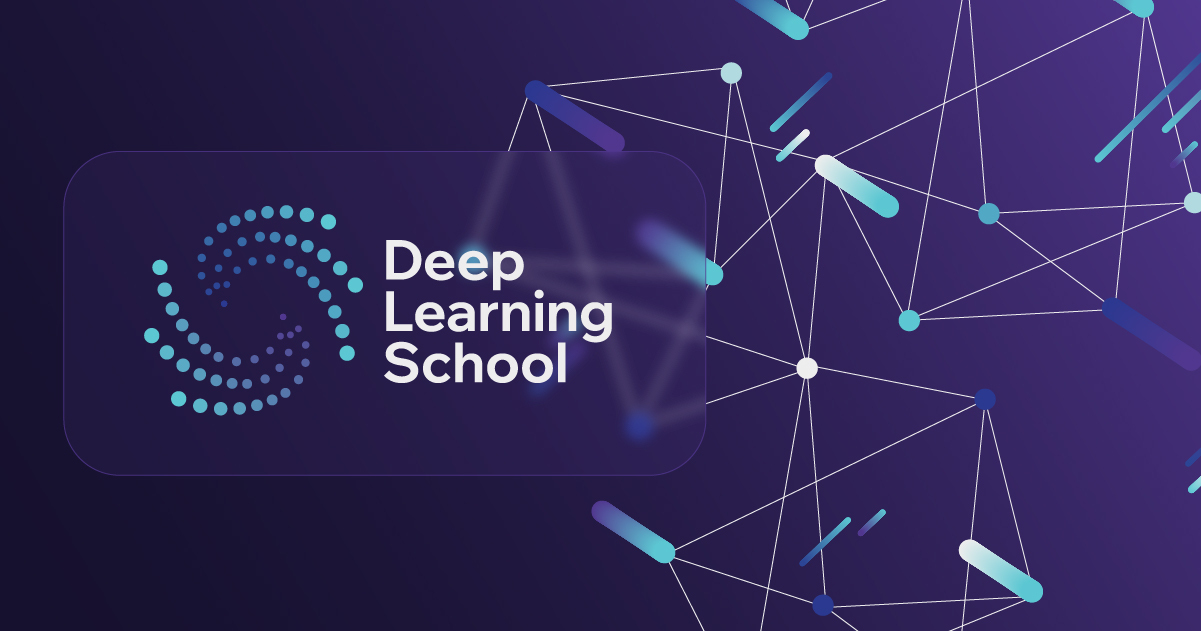

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

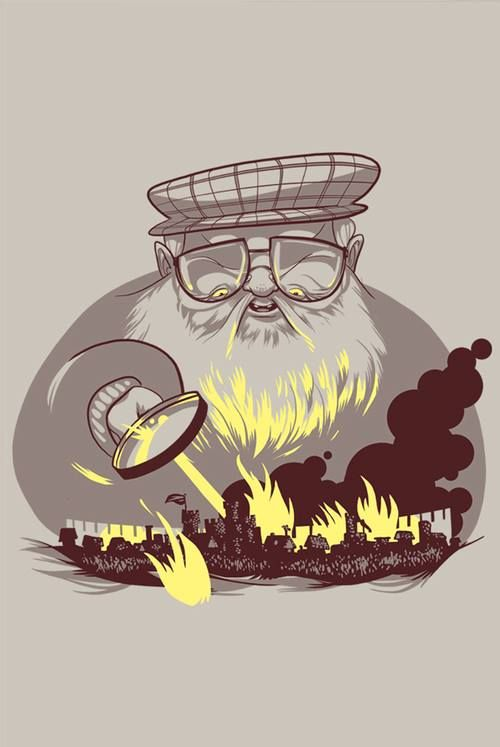

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.65$ --- 5 баллов

2) $0.65 > score \geqslant 0.50$ --- 4 балла

3) $0.50 > score \geqslant 0.45$ --- 3 балла

4) $0.45 > score \geqslant 0.40$ --- 2 балла

5) $0.40 > score \geqslant 0.35$ --- 1 балл

6) $0.35 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [5]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

"gdown" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.
"gdown" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [7]:
data = pd.read_csv('game_of_thrones_train.csv', index_col='S.No')

In [8]:
data.sample(5)

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,,,,,
22,Willis Fell,Ser,0,NaN,NaN,NaN,NaN,NaN,House Fell,NaN,0,0,0,0,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.023411,1
871,Qarl Shepherd,NaN,0,Ironborn,NaN,NaN,NaN,NaN,House Shepherd,NaN,0,0,0,0,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.006689,1
431,Daella Targaryen (daughter of Maekar I),Princess,1,Valyrian,199.0,NaN,NaN,NaN,House Targaryen,NaN,0,0,0,0,0,NaN,NaN,NaN,NaN,0,1,100.0,0,0.080268,0
230,Urrathon,NaN,0,Qartheen,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0,0,NaN,NaN,NaN,NaN,0,0,NaN,0,0.013378,1
972,Daeron Vaith,Lord of the Red Dunes,0,Dornish,NaN,NaN,NaN,NaN,House Vaith,NaN,0,0,0,1,1,NaN,NaN,NaN,NaN,0,1,NaN,0,0.010033,1


Посмотрите, какие типы данных представлены в нашем датасете

Знакомый нам метод describe() возвращает различную информацию для столбцов с числовыми типами данных, и с типами данных *object*

Давайте посмотрим на вывод для типа данных *object*. Для этого:
- сначала применим метод describe(). Укажем в качестве аргумента тип данных столбцов, статистику по которым мы хотим посмотреть (см. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html)
- для удобства восприятия транспонируем таблицу

In [9]:
data.describe(include = 'object').T

,count,unique,top,freq
name,1557,1557,Melara Hetherspoon,1
title,717,195,Ser,306
culture,488,51,Northmen,94
mother,18,16,Rhaenyra Targaryen,2
father,22,19,Daemon Targaryen,2
heir,21,20,Jaehaerys Targaryen,2
house,1176,315,House Frey,89
spouse,200,186,Walder Frey,6


Теперь давайте посмотрим на столбцы с числовыми типами данных. Дополните код ниже. Для удобства восприятия мы транспонировали таблицу и ограничили вывод тремя столбцами - количество строк без NaN, максимальное и минимальное значение (о кастомизации вариантах вывода describe() вы можете почитать в документации по ссылке выше).


In [10]:
data.describe(include = ['int64', 'float64']).T[['count', 'min', 'max']]

,count,min,max
male,1557.0,0.0,1.0
dateOfBirth,279.0,-25.0,299.0
book1,1557.0,0.0,1.0
book2,1557.0,0.0,1.0
book3,1557.0,0.0,1.0
book4,1557.0,0.0,1.0
book5,1557.0,0.0,1.0
isAliveMother,18.0,0.0,1.0
isAliveFather,22.0,0.0,1.0
isAliveHeir,21.0,0.0,1.0


Так мы проверим, есть ли в данных неадекватнные значения.   Большинство числовых столбцов - это числа от 0 до 1. Отрицательные значения `dateOfBirth` не являются ошибкой. Значения age и `numDeadRelations` также выглядят адекватными. Можно переходить к дальнейшим шагам анализа (анонс - а в тестовых данных нас будет ждать сюрприз).

**Задание 1.3.** Предобработка (очистка) данных.

В нашем домашнем задании все пропуски в данных (missing values) уже закодированы как NaN. Проанализируйте, в каких колонках и как часто встречаются NaN значения. Далее вам надо будет принять решение, как их обрабатывать.

In [11]:
print(f'Всего строк: {len(data)}')
data.info()

Всего строк: 1557
<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1557 non-null   object 
 1   title             717 non-null    object 
 2   male              1557 non-null   int64  
 3   culture           488 non-null    object 
 4   dateOfBirth       279 non-null    float64
 5   mother            18 non-null     object 
 6   father            22 non-null     object 
 7   heir              21 non-null     object 
 8   house             1176 non-null   object 
 9   spouse            200 non-null    object 
 10  book1             1557 non-null   int64  
 11  book2             1557 non-null   int64  
 12  book3             1557 non-null   int64  
 13  book4             1557 non-null   int64  
 14  book5             1557 non-null   int64  
 15  isAliveMother     18 non-null     float64
 16  isAliveFather     22 non-null

В этом задании удалять строки с NaN (dropna) мы не будем по следующим причинам:
- в обучающем датасете много признаков с большим количество пропусков. Если удалять все строки с NaN, то размер выборки сильно уменьшится. Мы потеряем много данных, которые можно было бы использовать для построения более точной модели.
- тестовом датасете также много признаков с NaN (вы можете в этом убедиться, если скачаете датасет и совершите с ним те же действия, что выше проделали с обучаюшим датасетом). Поэтому нам все-равно придется придумать способ кодировать NaN, чтобы модель делала прогнозы для всех персонажей из тестового датасета. Для этого нам потребуется сохранять, а не удалять данные в обучающем датасете.     



Как вы могли заметить, в наших данных очень много пропущенных значений, причём в некоторых случая пропущена **большая** часть значений. Поэтому заполнять по умолчанию медианой/средним/модой в данном случае - не самый лучший способ (однако, это довольно часто используемый метод заполнения, который может пригодиться вам в будущем)

Ниже мы посмотрим, как можно работать с признаками с большим количеством пропущенных значений.

**Задание 1.4.** Числовые признаки

У нас есть **признак popularity**. Постройте гистограмму распределения данного признака с количеством интервалов (bins), равным 50 (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html)

array([[<Axes: title={'center': 'popularity'}>]], dtype=object)

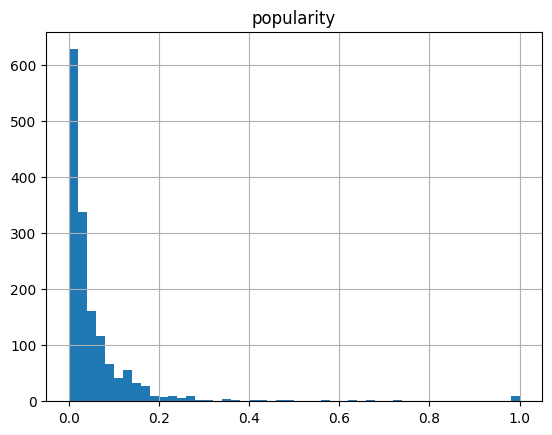

In [12]:
data.hist(column='popularity', bins=50)

Распределение сильно несимметрично. Можно преобразовать данный признак, например, по формуле `np.log10(data["popularity"]*M+1)` (добавляем 1 ради логарифма, так как для нектоторых персонажей `popularity==0`). В качестве M можно попробовать, например, M=100 или другое число.

При желании для `popularity` вы можете использовать свой способ шкалирования признаков с несимметричным распределением.


In [13]:
data['popularity'] = np.log10(data['popularity']*100+1)

array([[<Axes: title={'center': 'popularity'}>]], dtype=object)

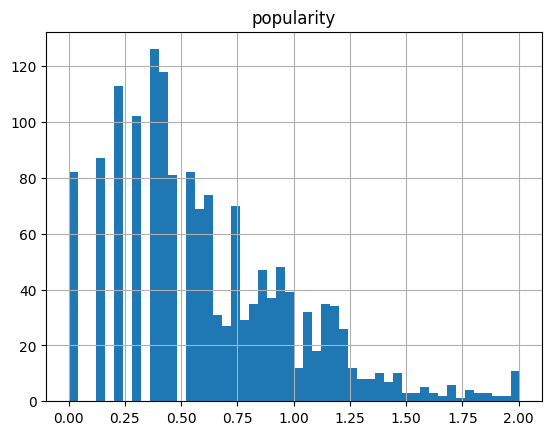

In [14]:
data.hist(column='popularity', bins=50)

В качестве альтернативного подхода вы можете попробовать дискретизацию признака popularity на основе квантилей (quantile binning), используя функцию qcut() (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html). В этом случае вы преобразуете числовой признак popularity в категориальный, для которого в дальнейшем надо будет применить one-hot кодирование.

Теперь давайте обработаем **признак numDeadRelations**.
Посмотрите на частотное распределение этого признака. Лишь для малого числа персонажей `numDeadRelations>0`.

Создайте признак `boolDeadRelations`. Давайте упростим признак `numDeadRelations`, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. `numDeadRelations > 0`, и те, у которых не было, т.е. `numDeadRelations = 0`.

Частота numDeadRelations >0: 0.04431599229287091


array([[<Axes: title={'center': 'numDeadRelations'}>]], dtype=object)

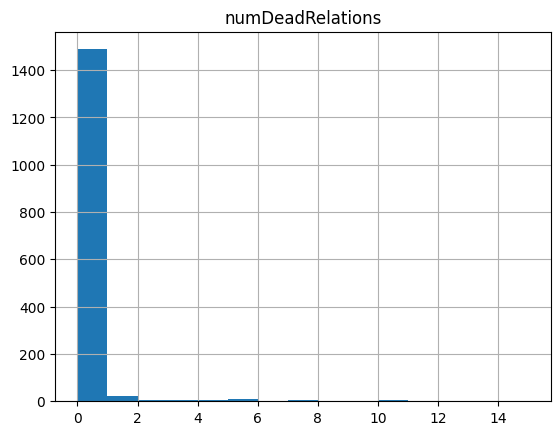

In [15]:
print(f'Частота numDeadRelations >0: {data[data["numDeadRelations"]>0]["numDeadRelations"].count()/len(data)}')

data.hist('numDeadRelations', bins=15)

In [16]:
data['boolDeadRelations'] = np.where(data['numDeadRelations']>0, 1, 0)

data.head(5)

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,boolDeadRelations
S.No,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,0,0,0,0,0,1.0,0.0,0.0,NaN,0,0,NaN,11,1.789123,0,1
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,97.0,1,1.957282,1,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,NaN,0,1.443355,1,0
4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,0,0,0,0,0,NaN,NaN,NaN,0.0,1,1,23.0,0,1.287682,0,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,29.0,0,0.728177,1,0


Наконец, давайте посмотрим на **признак age**. В нем очень много пропущенных значений. Для того, чтобы использовать в модели информацию о возрасте персонажа, мы создадим два новых признака: `age_value` и `age_no_data`

- Там где возраст указан, age_value принимает значение `age`, а `age_no_data` - значение 0.
- Там где возраст не указан, `age_value` принимает значение 0, а `age_no_data` - значение 1.  

Фактически, в переменной `age` мы заменяем NaN на 0, но одновременно добавляем в модель еще один бинарный признак `age_no_data`, несущий информацию о том, у каких персонажей не был указан возраст:        

In [17]:
data['age_value'] = np.where(data['age'].notna(), data['age'], 0)
data['age_no_data'] = [1 if np.isnan(x) else 0 for x in data['age']]

Этот способ чем-то похож на работу с категориальной переменными с пропущенными значениями, когда мы добавляем еще одну категорию no_data и заменяем NaN на значение этой категории.

Если вы заходите похожим образом образом обработать признак `dateOfBirth`, **обратите внимание**, что у одних и тех же персонажей не указан и возраст, и год рождения.
То есть созданные признаки `age_no_data` и `dateOfBirth_no_data` будут полностью совпадать, и в модель надо будет включать только один из признаков: или `age_no_data`, или `dateOfBirth_no_data`.

In [18]:
# обработаю age через заполнение NaN медианой
data['age'] = data['age'].fillna(data['age'].median())

# Аналогично с dateOfBirth
data['dateOfBirth'] = data['dateOfBirth'].fillna(data['dateOfBirth'].median())

**Задание 1.5.** Категориальные признаки с большим количеством категорий

**Признак culture** содержит информацию о принадлежности к одному из народов во вселенной Игры Престолов.

Давайте посмотрим, какие значения принимает данный признак. По умолчанию метод `value_counts()` игнорирует пропуски в данных, поэтому используем этот метод с параметром **dropna** со значением **False** (см. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.value_counts.html)

In [19]:
data['culture'].value_counts(dropna=False)

culture
NaN                        1069
Northmen                     94
Ironborn                     91
Free Folk                    45
Braavosi                     39
Valyrian                     28
Ghiscari                     17
Dornish                      17
Dothraki                     17
Reach                        13
Vale mountain clans          12
Rivermen                     10
Valemen                      10
northmen                      9
Westerman                     8
Free folk                     7
Tyroshi                       6
Qartheen                      5
Stormlands                    4
Summer Isles                  4
Astapori                      4
Westeros                      3
Dornishmen                    3
Ironmen                       3
Northern mountain clans       3
Westermen                     3
Lysene                        2
westermen                     2
Meereenese                    2
Myrish                        2
Crannogmen                    2


Из полученного частотного распределения видно, что для большого числа персонажей значения данного признака не указаны. Также есть много редких значений признака, которые в выборке повторяются один или несколько раз. Причина отчасти в том, что один и тот же народ упоминается в нашем датасете под разными названиями.

Данную проблему мы попытаемся решить, сгруппировав народы в более крупные категории. Так мы одновременно решим проблему того, что один и тот же народ назван в выборке разными способами.

Предоженный вариант группировки имеет определенную логику. Выделяются следующие группы:
- старые нации, которые уже не сущевали как отдельные народы на момент повествования основной линии повествования романов, но отдельные потомки могли еще быть живы
- народы, проживающие в королевствах континента Весторос (для каждого королевства - своя группа)
- народы континента Эссос
- прочие народы

In [20]:
cultures_grouped = {
    'Old Nations': ['valyrian', 'first men', 'andal', 'andals', 'rhoynar'],
    'the North': ['northmen', 'northern mountain clans', 'crannogmen'],
    'the Iron Islands': ['ironborn', 'ironborn', 'ironmen'],
    'the Mountain and the Vale': ['valemen', 'vale', 'vale mountain clans',
                              'sistermen'],
    'the Isles and Rivers': ['riverlands', 'rivermen'],
    'the Rock': ['westerman', 'westermen', 'westerlands'],
    'the Stormlands': ['stormlander', 'stormlands'],
    'the Reach': ['reach', 'reachmen', 'the reach'],
    'Dorne': ['dornish', 'dornishmen', 'dorne'],
    'Essos Nations': ['astapor', 'astapori', 'braavosi', 'braavos', 'tyroshi', 'lysene', 'lyseni',
                      'myrish', 'pentoshi', 'qartheen', 'qarth', 'dothraki',
                      'lhazarene', 'lhazareen','meereen', 'meereenese',
                      'norvoshi', 'qohor', 'summer isles', 'summer islands',
                      'summer islander', 'asshai', "asshai'i", 'norvos', 'ghiscari',
                      'ghiscaricari'],
    'Other Nations': ['ibbenese', 'westeros', 'free folk', 'wildling', 'wildlings', 'naathi']}

**Обратите внимание, что некоторые варианты названий народов встречаются только в тестовых данных, и не встречаются в обучающих данных.** Такая ситуация нередко случается на практике. Поэтому, после обработки обучающих данных и обучения модели важно задать для модели правило, как она должна обрабатывать "незнакомые" категории в категориальных признаках. Например, можно относить объекты с "незнакомой" категорией к некоторой существующей категории или указать формулу расчета для "незнакомой" категории.     

Предложенный вам словарь `cultures_grouped` составлен по всем значениям признака `culture`, встречающимся в тренировочном либо в тестовом датасете. Здесь важно, что все укрупненные категории (ключи/keys словаря `cultures_grouped`) представлены в обоих датасетах, а уникальные для тестового датасета названия народов - это отдельные названия народов внутри укрупненных категорий (значения/values словаря). Поэтому, когда вы будете работать с тестовыми - просто применяйте этот словарь без указания правила обработки "незнакомых" категорий.

Давайте приступим к кодировке значений признака culture.
Для этого сначала инвертируем словарь *cultures_grouped*

In [21]:
#Довольно просто инвертировать словарь, где ключу соответствует одно значение
#В нашем случае ключу соответствует список значений.
#Ниже показан пример, как можно инвертировать такой словарь

d = {'A': ['a1', 'a2', 'a3'],
     'B': ['b1', 'b2', 'b3', 'b4']}

d_inverted = {}
for k in d.keys():
  for v in d[k]:
      d_inverted.update({v:k})

d_inverted

{'a1': 'A', 'a2': 'A', 'a3': 'A', 'b1': 'B', 'b2': 'B', 'b3': 'B', 'b4': 'B'}

In [22]:
# По аналогии с примером выше инвертируйте словарь cultures_grouped
cultures_grouped_inverted = {}
for k in cultures_grouped.keys():
    for v in cultures_grouped[k]:
        cultures_grouped_inverted[v] = k

cultures_grouped_inverted

{'valyrian': 'Old Nations',
 'first men': 'Old Nations',
 'andal': 'Old Nations',
 'andals': 'Old Nations',
 'rhoynar': 'Old Nations',
 'northmen': 'the North',
 'northern mountain clans': 'the North',
 'crannogmen': 'the North',
 'ironborn': 'the Iron Islands',
 'ironmen': 'the Iron Islands',
 'valemen': 'the Mountain and the Vale',
 'vale': 'the Mountain and the Vale',
 'vale mountain clans': 'the Mountain and the Vale',
 'sistermen': 'the Mountain and the Vale',
 'riverlands': 'the Isles and Rivers',
 'rivermen': 'the Isles and Rivers',
 'westerman': 'the Rock',
 'westermen': 'the Rock',
 'westerlands': 'the Rock',
 'stormlander': 'the Stormlands',
 'stormlands': 'the Stormlands',
 'reach': 'the Reach',
 'reachmen': 'the Reach',
 'the reach': 'the Reach',
 'dornish': 'Dorne',
 'dornishmen': 'Dorne',
 'dorne': 'Dorne',
 'astapor': 'Essos Nations',
 'astapori': 'Essos Nations',
 'braavosi': 'Essos Nations',
 'braavos': 'Essos Nations',
 'tyroshi': 'Essos Nations',
 'lysene': 'Essos Na

Теперь создадим новый столбец с укрупненными значениями culture.

Для этого будем использовать метод `map()` с инвертированным словарем в качестве аргумента (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.map.html)

Обратите внимание, что в словаре названия народов указаны в нижнем регистре. А в датасете используется как нижний, так и верхний регистр. Поэтому перед применением метода `map()` переведем значения столбца culture в нижний регистр при помощи метода `str.lower()` (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.lower.html).

In [23]:
data['culture_grouped'] = data['culture'].str.lower().map(cultures_grouped_inverted)

Осталось заменить все NaN в созданном столбце на категорию `culture_no_data`:

In [24]:
data['culture_grouped'] = data['culture_grouped'].fillna('culture_no_data')
data = data.drop('culture', axis=1)

data

,name,title,male,dateOfBirth,mother,father,heir,house,spouse,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,boolDeadRelations,age_value,age_no_data,culture_grouped
S.No,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,272.0,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,0,0,0,0,0,1.0,0.0,0.0,NaN,0,0,24.0,11,1.789123,0,1,0.0,1,culture_no_data
2,Walder Frey,Lord of the Crossing,1,208.0,NaN,NaN,NaN,House Frey,Perra Royce,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,97.0,1,1.957282,1,1,97.0,0,the Isles and Rivers
3,Addison Hill,Ser,1,272.0,NaN,NaN,NaN,House Swyft,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,24.0,0,1.443355,1,0,0.0,1,culture_no_data
4,Aemma Arryn,Queen,0,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,0,0,0,0,0,NaN,NaN,NaN,0.0,1,1,23.0,0,1.287682,0,0,23.0,0,culture_no_data
5,Sylva Santagar,Greenstone,0,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,29.0,0,0.728177,1,0,29.0,0,Dorne
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,Archmaester,1,272.0,NaN,NaN,NaN,NaN,NaN,1,0,1,1,0,NaN,NaN,NaN,NaN,0,1,24.0,0,1.231814,1,0,0.0,1,culture_no_data
1554,Masha Heddle,NaN,0,272.0,NaN,NaN,NaN,NaN,NaN,1,1,0,0,0,NaN,NaN,NaN,NaN,0,0,24.0,0,0.700130,0,0,0.0,1,culture_no_data
1555,Matthos Seaworth,NaN,1,272.0,NaN,NaN,NaN,House Seaworth,NaN,0,1,1,1,1,NaN,NaN,NaN,NaN,0,0,24.0,0,0.939135,0,0,0.0,1,culture_no_data


Распределение сгруппированной переменной выглядит гораздо лучше. Но по прежнему есть несколько слабо представленых групп.

Дальнейшую работу с этим признаком проводите на свое усмотрение для повышения качества прогноза модели. Например, можно объединить несколько слабо представленных категорий в одну или применить другой подход.

In [25]:
# Пока ничего не делаем
data['culture_grouped'].value_counts(dropna=False)

culture_grouped
culture_no_data              1069
Essos Nations                 109
the North                     108
the Iron Islands               95
Other Nations                  57
Old Nations                    32
the Mountain and the Vale      25
Dorne                          21
the Rock                       14
the Reach                      13
the Isles and Rivers           10
the Stormlands                  4
Name: count, dtype: int64

In [26]:
# Для culture_grouped используем target encoding

culture_target = data.groupby('culture_grouped')['isAlive'].mean()
data['culture_target'] = data['culture_grouped'].map(culture_target)

data

,name,title,male,dateOfBirth,mother,father,heir,house,spouse,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,boolDeadRelations,age_value,age_no_data,culture_grouped,culture_target
S.No,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,272.0,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,0,0,0,0,0,1.0,0.0,0.0,NaN,0,0,24.0,11,1.789123,0,1,0.0,1,culture_no_data,0.781104
2,Walder Frey,Lord of the Crossing,1,208.0,NaN,NaN,NaN,House Frey,Perra Royce,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,97.0,1,1.957282,1,1,97.0,0,the Isles and Rivers,0.700000
3,Addison Hill,Ser,1,272.0,NaN,NaN,NaN,House Swyft,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,24.0,0,1.443355,1,0,0.0,1,culture_no_data,0.781104
4,Aemma Arryn,Queen,0,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,0,0,0,0,0,NaN,NaN,NaN,0.0,1,1,23.0,0,1.287682,0,0,23.0,0,culture_no_data,0.781104
5,Sylva Santagar,Greenstone,0,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,29.0,0,0.728177,1,0,29.0,0,Dorne,0.952381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,Archmaester,1,272.0,NaN,NaN,NaN,NaN,NaN,1,0,1,1,0,NaN,NaN,NaN,NaN,0,1,24.0,0,1.231814,1,0,0.0,1,culture_no_data,0.781104
1554,Masha Heddle,NaN,0,272.0,NaN,NaN,NaN,NaN,NaN,1,1,0,0,0,NaN,NaN,NaN,NaN,0,0,24.0,0,0.700130,0,0,0.0,1,culture_no_data,0.781104
1555,Matthos Seaworth,NaN,1,272.0,NaN,NaN,NaN,House Seaworth,NaN,0,1,1,1,1,NaN,NaN,NaN,NaN,0,0,24.0,0,0.939135,0,0,0.0,1,culture_no_data,0.781104


**Задание 1.6.** Категориальные признаки в линейных моделях

Для включения категориальных признаков в линейную модель их нужно преобразовать в числовые признаки.

Если признак принимает одно из двух возможных значений (например, персонаж "появляется" или "не появляется" в 1-й книге), он напрямую кодируется в бинарный признак ("появляется" -> 1, "не появляется" -> 0). Если признак принимает больше двух значений, его можно преобразовать в несколько бинарных при помощи one-hot преобразования. В некоторых случаях бывает полезно объединить некоторые категории, как мы это поступили с признаком *culture*.

Порядковых признаков у нас в задаче нет, поэтому рассматривать их здесь мы не будем.

Для того, чтобы найти все порядковые признаки, посмотрим на количество уникальных значений, которые встречаются в столбцах. Для столбцов с типом object количество уникальных значений мы выводили  при помощи метода `describe()` в задании 1.2.

Чтобы посмотреть количество уникальных значений для всех столбцов, можно воспользоваться методом nunique() (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html)

In [27]:
# Количество уникальнх значений в каждом столбце
data.nunique()

name                 1557
title                 195
male                    2
dateOfBirth           105
mother                 16
father                 19
heir                   20
house                 315
spouse                186
book1                   2
book2                   2
book3                   2
book4                   2
book5                   2
isAliveMother           2
isAliveFather           2
isAliveHeir             2
isAliveSpouse           2
isMarried               2
isNoble                 2
age                    72
numDeadRelations       14
popularity            117
isAlive                 2
boolDeadRelations       2
age_value              72
age_no_data             2
culture_grouped        12
culture_target         12
dtype: int64

In [28]:
# Для числовых столбцов можно вывести в одну таблицу более детальную статистику, объединив выводы describe() и nunique()
# Код ниже требуется дополнить по аналогии с заданием 1.2.
data.describe(include = ['float64', 'int64']).T[['count', 'min', 'max']].assign(N_unique_values = data.nunique())

,count,min,max,N_unique_values
male,1557.0,0.00000,1.000000,2
dateOfBirth,1557.0,-25.00000,299.000000,105
book1,1557.0,0.00000,1.000000,2
book2,1557.0,0.00000,1.000000,2
book3,1557.0,0.00000,1.000000,2
book4,1557.0,0.00000,1.000000,2
book5,1557.0,0.00000,1.000000,2
isAliveMother,18.0,0.00000,1.000000,2
isAliveFather,22.0,0.00000,1.000000,2
isAliveHeir,21.0,0.00000,1.000000,2


Посмотрев на количество уникальных значений мы можем выделить категориальные признаки. Например, `popularity` принимает значения от 0 до 1, но это непрерывный числовой признак. Остальные признаки со значениями от 0 до 1 - принимают только два значения, то есть являются бинарными.

Бинарные признаки без NaN полностью готовы для включения в модель. Некоторые бинарные признаки содержат пропуски, поэтому, если вы захотите включить их в модель, их потребуется обработать.

In [29]:
data['isAliveSpouse'] = data['isAliveSpouse'].fillna(0.5)
data['isAliveHeir'] = data['isAliveHeir'].fillna(0.5)
data['isAliveMother'] = data['isAliveMother'].fillna(0.5)
data['isAliveFather'] = data['isAliveFather'].fillna(0.5)

data['house'] = data['house'].fillna('No house')

data['title'] = data['title'].fillna('Other')

In [30]:
# Дропаем ненужные категориальные признаки
data = data.drop(['mother', 'father', 'heir', 'spouse', 'name'], axis=1)

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1557 non-null   object 
 1   male               1557 non-null   int64  
 2   dateOfBirth        1557 non-null   float64
 3   house              1557 non-null   object 
 4   book1              1557 non-null   int64  
 5   book2              1557 non-null   int64  
 6   book3              1557 non-null   int64  
 7   book4              1557 non-null   int64  
 8   book5              1557 non-null   int64  
 9   isAliveMother      1557 non-null   float64
 10  isAliveFather      1557 non-null   float64
 11  isAliveHeir        1557 non-null   float64
 12  isAliveSpouse      1557 non-null   float64
 13  isMarried          1557 non-null   int64  
 14  isNoble            1557 non-null   int64  
 15  age                1557 non-null   float64
 16  numDeadRelations   1557 non-n

Для бинарных признаков их связь с зависимой переменной можно прикинуть по таблице корреляций. Для категориальных признаков с количеством значений больше двух (или с двумя значениями и NaN) можно сделать one-hot преобразования и посчитать корреряцию зависимой переменной с набором сгенерированных бинарных признаков.
В качестве альтернативного подхода можно использовать сравнение средних значений зависимой переменной для разных категорий исследуемого признака. Чем сильнее различаются средние значения целевой переменной между категориями, тем вероятнее, что данный признак связан с зависимой переменной.

In [31]:
# попробуйте провести сравнение средних зависимой пременной isAlive для признака isAliveSpouse

data.groupby('isAliveSpouse', dropna = False)['isAlive'].mean()
pd.pivot_table(data = data, values = 'isAlive', index = 'isAliveSpouse', aggfunc=['mean', 'count'], dropna=False)

,mean,count
,isAlive,isAlive
isAliveSpouse,,
0.0,0.619048,42
0.5,0.786293,1357
1.0,0.753165,158


**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик. Не забудьте, что потом аналогичным образом вам надо будет преобразовывать тестовый датасет, используя тот же алгоритм кодирования признаков.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [32]:
other_titles = data['title'].value_counts()
other_titles = other_titles[other_titles < 3].index

data['title'] = data['title'].replace(other_titles, 'Other')

# используем target encoding
title_target = data.groupby('title')['isAlive'].mean()
data['title_target'] = data['title'].map(title_target)

data

,title,male,dateOfBirth,house,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,boolDeadRelations,age_value,age_no_data,culture_grouped,culture_target,title_target
S.No,,,,,,,,,,,,,,,,,,,,,,,,,
1,Other,1,272.0,No house,0,0,0,0,0,1.0,0.0,0.0,0.5,0,0,24.0,11,1.789123,0,1,0.0,1,culture_no_data,0.781104,0.791465
2,Other,1,208.0,House Frey,1,1,1,1,1,0.5,0.5,0.5,1.0,1,1,97.0,1,1.957282,1,1,97.0,0,the Isles and Rivers,0.700000,0.791465
3,Ser,1,272.0,House Swyft,0,0,0,1,0,0.5,0.5,0.5,0.5,0,1,24.0,0,1.443355,1,0,0.0,1,culture_no_data,0.781104,0.774510
4,Queen,0,82.0,House Arryn,0,0,0,0,0,0.5,0.5,0.5,0.0,1,1,23.0,0,1.287682,0,0,23.0,0,culture_no_data,0.781104,0.000000
5,Other,0,276.0,House Santagar,0,0,0,1,0,0.5,0.5,0.5,1.0,1,1,29.0,0,0.728177,1,0,29.0,0,Dorne,0.952381,0.791465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Archmaester,1,272.0,No house,1,0,1,1,0,0.5,0.5,0.5,0.5,0,1,24.0,0,1.231814,1,0,0.0,1,culture_no_data,0.781104,1.000000
1554,Other,0,272.0,No house,1,1,0,0,0,0.5,0.5,0.5,0.5,0,0,24.0,0,0.700130,0,0,0.0,1,culture_no_data,0.781104,0.791465
1555,Other,1,272.0,House Seaworth,0,1,1,1,1,0.5,0.5,0.5,0.5,0,0,24.0,0,0.939135,0,0,0.0,1,culture_no_data,0.781104,0.791465


In [33]:
# Для house используем target encoding ("выживаемость" дома)

house_target = data.groupby('house')['isAlive'].mean()
data['house_target'] = data['house'].map(house_target)

data

,title,male,dateOfBirth,house,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,boolDeadRelations,age_value,age_no_data,culture_grouped,culture_target,title_target,house_target
S.No,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Other,1,272.0,No house,0,0,0,0,0,1.0,0.0,0.0,0.5,0,0,24.0,11,1.789123,0,1,0.0,1,culture_no_data,0.781104,0.791465,0.803150
2,Other,1,208.0,House Frey,1,1,1,1,1,0.5,0.5,0.5,1.0,1,1,97.0,1,1.957282,1,1,97.0,0,the Isles and Rivers,0.700000,0.791465,0.898876
3,Ser,1,272.0,House Swyft,0,0,0,1,0,0.5,0.5,0.5,0.5,0,1,24.0,0,1.443355,1,0,0.0,1,culture_no_data,0.781104,0.774510,1.000000
4,Queen,0,82.0,House Arryn,0,0,0,0,0,0.5,0.5,0.5,0.0,1,1,23.0,0,1.287682,0,0,23.0,0,culture_no_data,0.781104,0.000000,0.636364
5,Other,0,276.0,House Santagar,0,0,0,1,0,0.5,0.5,0.5,1.0,1,1,29.0,0,0.728177,1,0,29.0,0,Dorne,0.952381,0.791465,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Archmaester,1,272.0,No house,1,0,1,1,0,0.5,0.5,0.5,0.5,0,1,24.0,0,1.231814,1,0,0.0,1,culture_no_data,0.781104,1.000000,0.803150
1554,Other,0,272.0,No house,1,1,0,0,0,0.5,0.5,0.5,0.5,0,0,24.0,0,0.700130,0,0,0.0,1,culture_no_data,0.781104,0.791465,0.803150
1555,Other,1,272.0,House Seaworth,0,1,1,1,1,0.5,0.5,0.5,0.5,0,0,24.0,0,0.939135,0,0,0.0,1,culture_no_data,0.781104,0.791465,0.428571


In [34]:
data = data.drop(['house', 'culture_grouped', 'title'], axis=1)

data.info() # Все значения численные

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   male               1557 non-null   int64  
 1   dateOfBirth        1557 non-null   float64
 2   book1              1557 non-null   int64  
 3   book2              1557 non-null   int64  
 4   book3              1557 non-null   int64  
 5   book4              1557 non-null   int64  
 6   book5              1557 non-null   int64  
 7   isAliveMother      1557 non-null   float64
 8   isAliveFather      1557 non-null   float64
 9   isAliveHeir        1557 non-null   float64
 10  isAliveSpouse      1557 non-null   float64
 11  isMarried          1557 non-null   int64  
 12  isNoble            1557 non-null   int64  
 13  age                1557 non-null   float64
 14  numDeadRelations   1557 non-null   int64  
 15  popularity         1557 non-null   float64
 16  isAlive            1557 non-n

<Axes: >

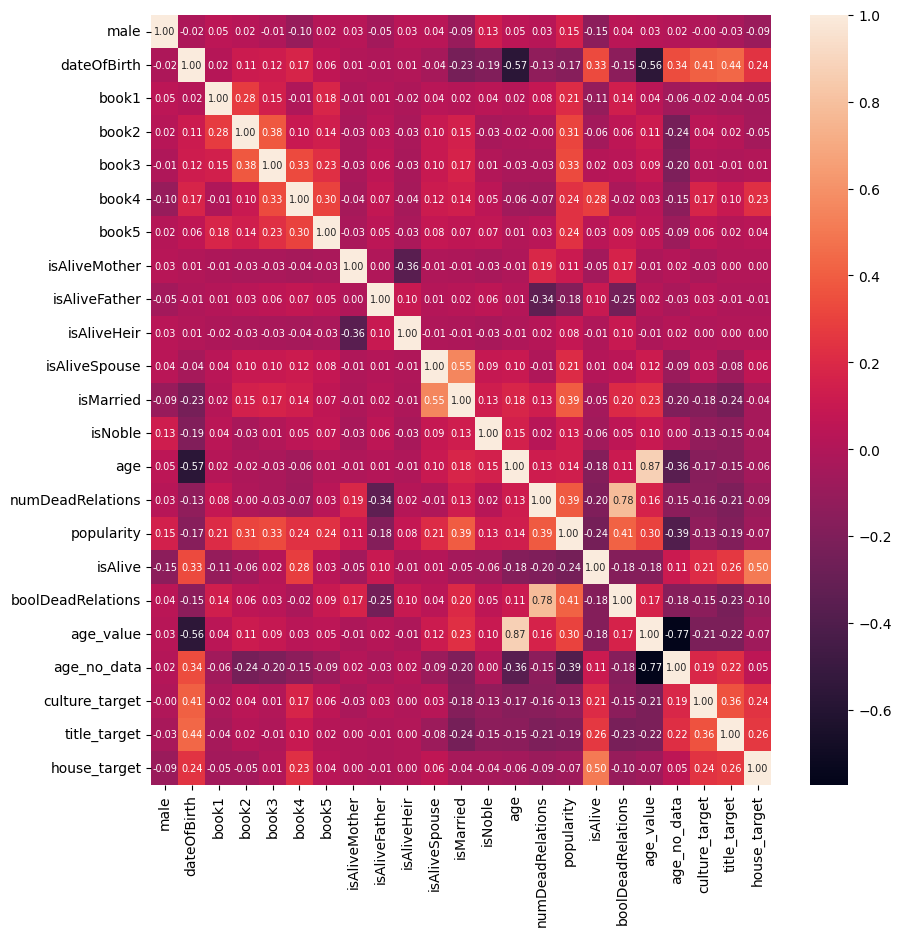

In [35]:
corrs = data.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corrs, annot=True, annot_kws={'size':7}, fmt='.2f')

# наиболее сильные корреляции с isAlive - house_target, book4, age_no_data
# недопустимо сильных корреляций между признаками нет

In [36]:
# из-за корреляций удаляем
data = data.drop(['boolDeadRelations', 'age_value', 'age_no_data'], axis=1)

In [37]:
# Можно еще дополнительно проверить по VIF
# Мультиколлинеарности нет
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = data.drop('isAlive', axis=1).copy()
X = add_constant(X)

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data = vif_data.sort_values(by="VIF", ascending=False)

vif_data

,Feature,VIF
0,const,534.636697
2,dateOfBirth,2.152442
16,popularity,2.015783
12,isMarried,1.886084
14,age,1.556819
11,isAliveSpouse,1.532277
15,numDeadRelations,1.465849
18,title_target,1.431925
6,book4,1.415049
5,book3,1.407673


**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

([<matplotlib.patches.Wedge at 0x1b574c4c4d0>,
 [Text(-0.84407383662417, 0.7053646988094556, 'Мертвые'),
  Text(0.8440738982891097, -0.7053646250181715, 'Живые')],
 [Text(-0.46040391088591087, 0.38474438116879395, '77.8%'),
  Text(0.46040394452133254, -0.3847443409190026, '22.2%')])

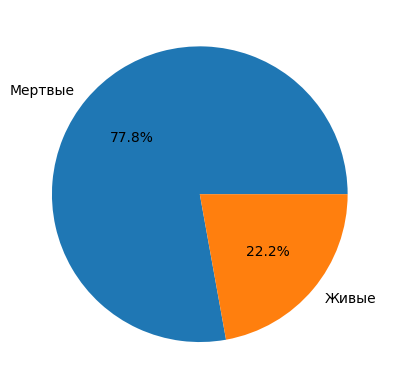

In [38]:
plt.pie(data['isAlive'].value_counts(), labels=['Мертвые', 'Живые'], autopct='%1.1f%%')

# Дисбаланс 2:7

In [39]:
binary_features = ['male', 'book1', 'book2', 'book3', 'book4', 'book5', 'isMarried', 'isNoble']
numerical_features = ['dateOfBirth', 'age', 'numDeadRelations', 'popularity']

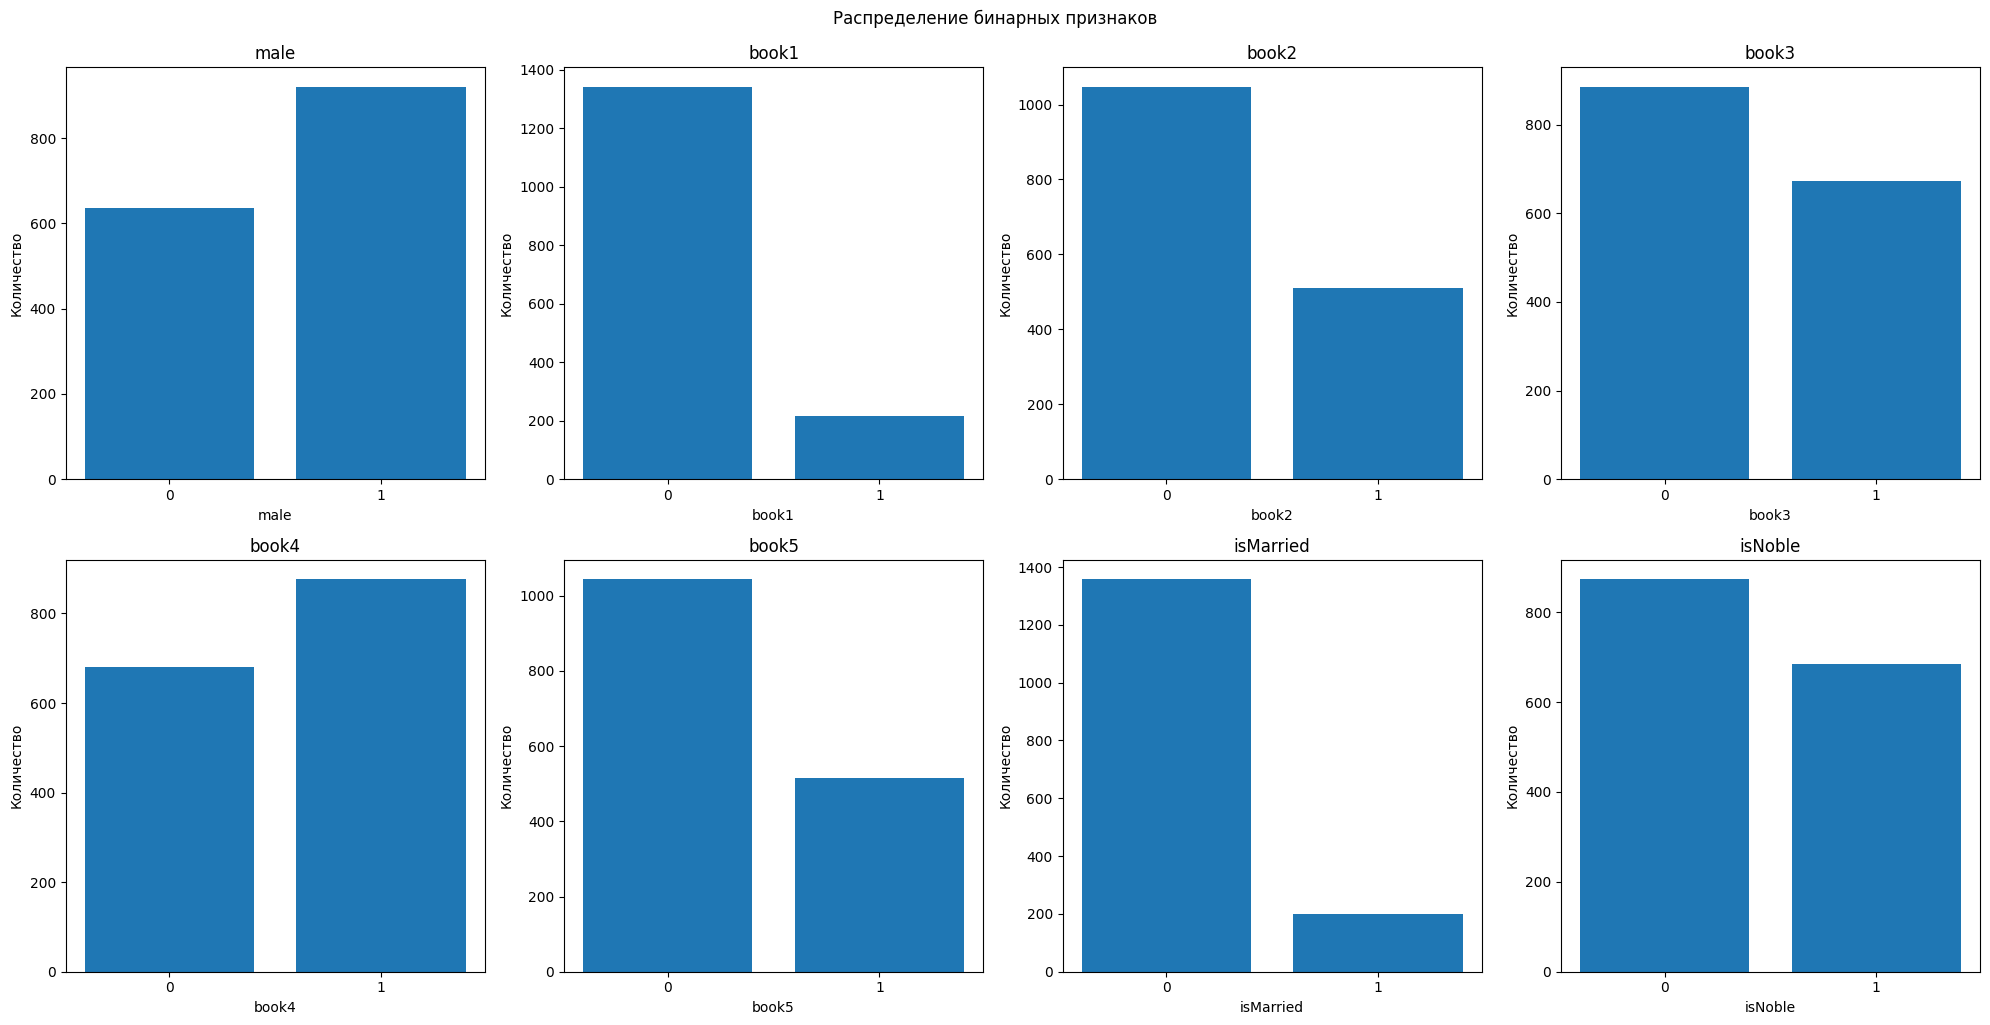

In [169]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for i, feature in enumerate(binary_features):
    counts_feature = data[feature].value_counts().sort_index()
    axes[i].bar(counts_feature.index, counts_feature.values)
    
    axes[i].set_title(f'{feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Количество')
    axes[i].set_xticks([0, 1])
    axes[i].set_xticklabels([f'0', f'1'])

plt.tight_layout()
plt.suptitle('Распределение бинарных признаков', y=1.02)
plt.show()

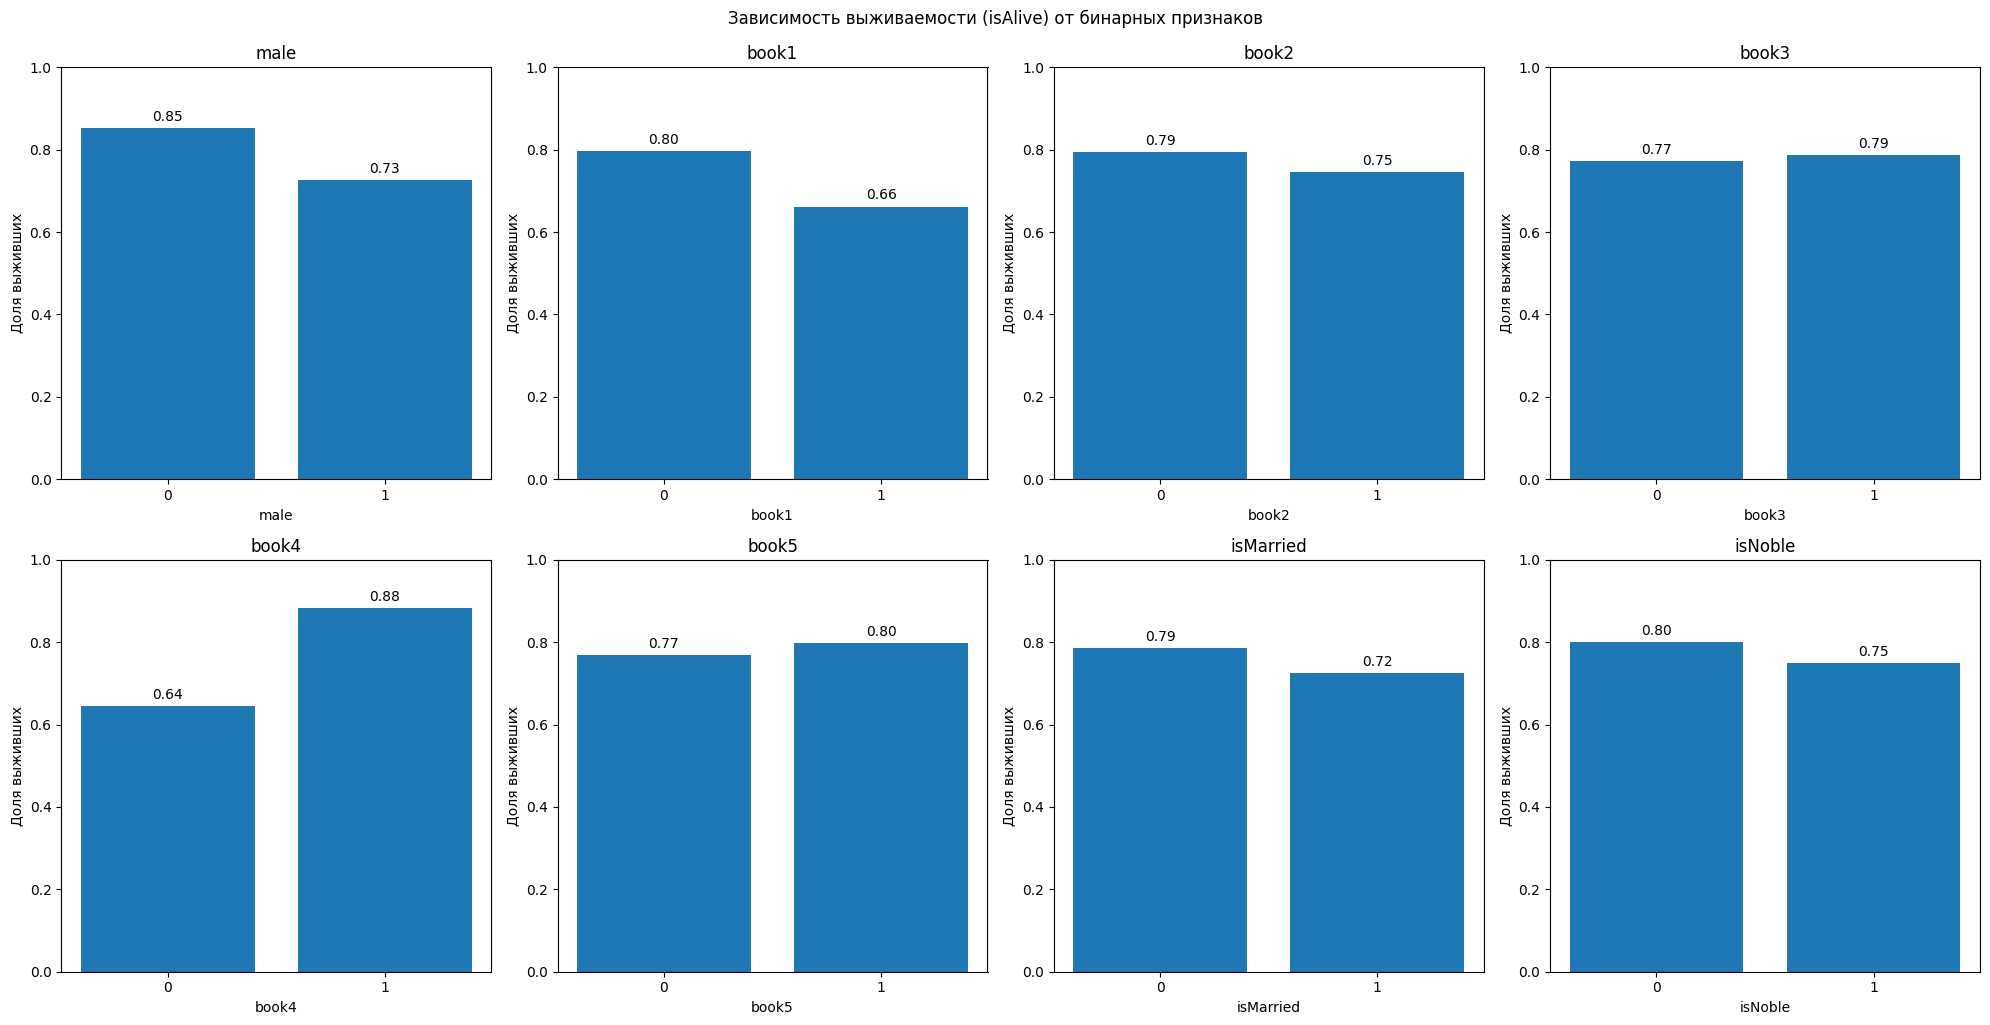

In [40]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for i, feature in enumerate(binary_features):
    # Считаем среднюю выживаемость для каждого значения признака
    survival_rate = data.groupby(feature)['isAlive'].mean()
    
    axes[i].bar(survival_rate.index, survival_rate.values)
    
    for j, value in enumerate(survival_rate.values):
        axes[i].text(j, value + 0.01, f'{value:.2f}', ha='center', va='bottom')
    
    axes[i].set_title(f'{feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Доля выживших')
    axes[i].set_xticks([0, 1])
    axes[i].set_xticklabels([f'0', f'1'])
    axes[i].set_ylim(0, 1)

plt.tight_layout()
plt.suptitle('Зависимость выживаемости (isAlive) от бинарных признаков', y=1.02)
plt.show()

# наибольшую корреляцию с isAlive имеет male и book4

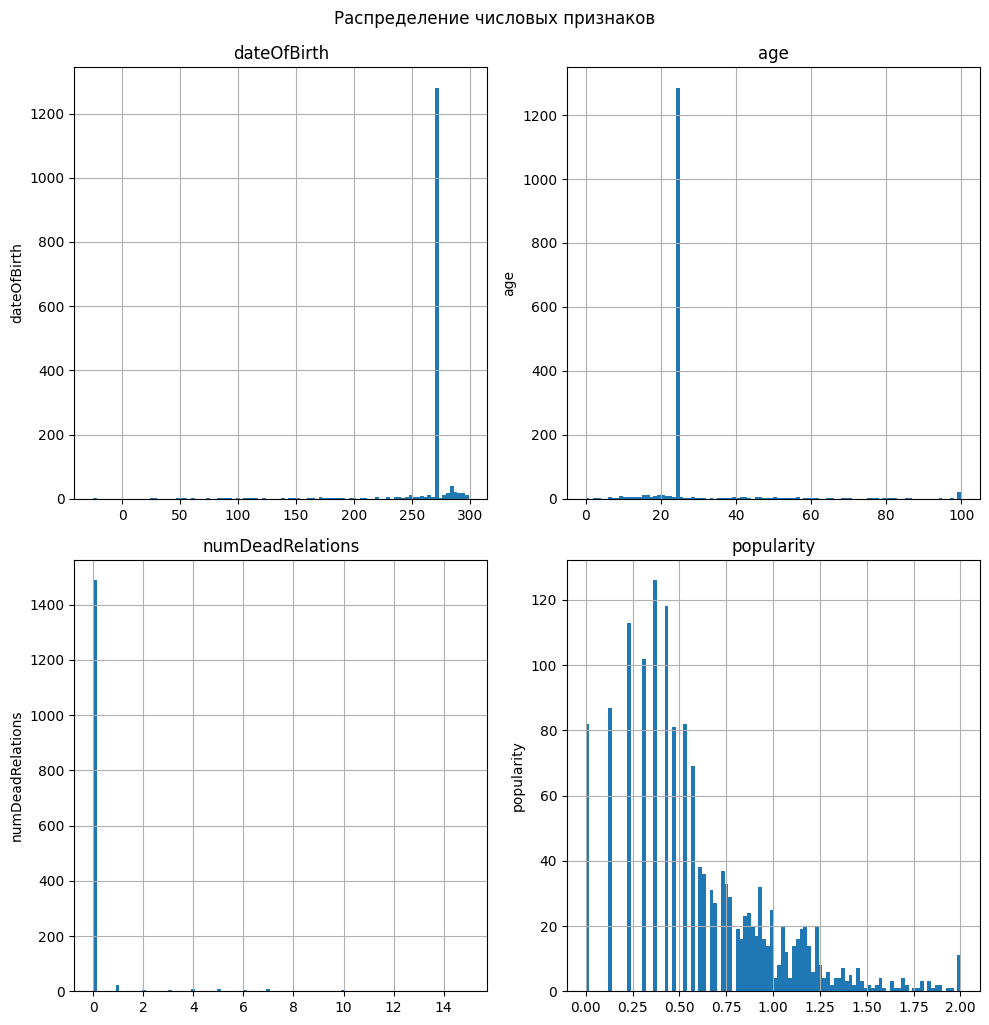

In [173]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    data.hist(column=feature, bins=100, ax=axes[i])
    axes[i].set_title(f'{feature}')
    axes[i].set_ylabel(feature)

plt.tight_layout()
plt.suptitle('Распределение числовых признаков', y=1.02)
plt.show()

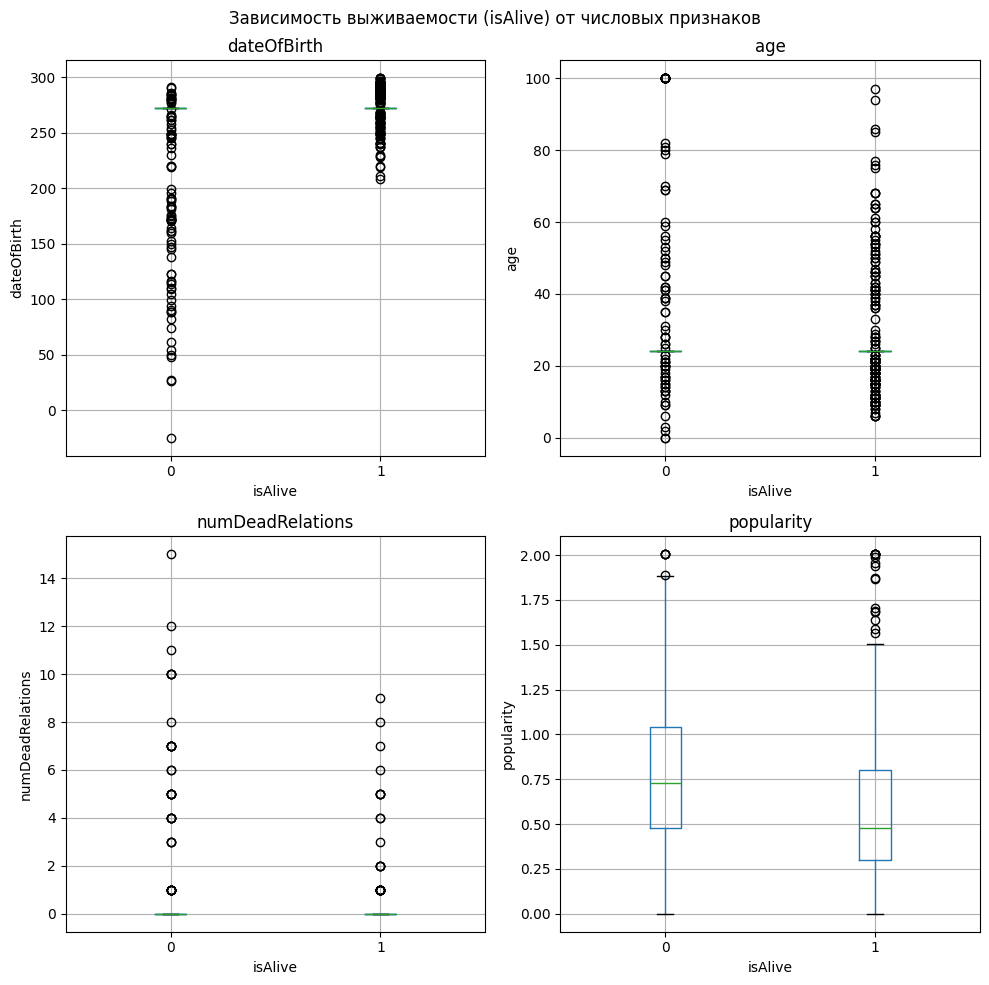

In [41]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    # Считаем среднюю выживаемость для каждого значения признака
    data.boxplot(column=feature, by='isAlive', ax=axes[i])
    axes[i].set_title(f'{feature}')
    axes[i].set_ylabel(feature)

plt.tight_layout()
plt.suptitle('Зависимость выживаемости (isAlive) от числовых признаков')
plt.show()

# умирают в диапазоне dateOfBirth от 200 до 300
# у первонажей, которые живы, может быть даже больше numDeadRelations, чем у умерших
# у умерших пресонажей 0.5 квартиль < 0.5 квартиля живых, но больше выбросов, приближенных к 2 (максимальное значение)

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, которые вы отобрали для включения в модель, и `y`, которая будет хранить только значения целевой переменной.

In [42]:
X = data.drop('isAlive', axis=1)
y = data['isAlive']

**Задание 1.10.** Разделите датасет обучащую и валидационные части (train и val) при помощи функции `train_test_split` (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
# не забудьте в функции train_test_split задать параметр random_state,
# чтобы обеспечить повторяемость разбиения выборки на train и validation части.
# Это позволит сравнивать метрики моделей с различными методами подготовки признаков
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.**


Вым можете работать с одно из предложенных моделей из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


Однако в этом домашнем задании мы предлагаем выбрать и поработать с моделью `LogisticRegression`.

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV  
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [46]:
results = {}

In [47]:
# Logistic Regression

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.fit_transform(X_val)

lr_model = LogisticRegression(random_state=42)

param_grid_logreg = [
    {
        'penalty': ['l1'],
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['liblinear', 'saga'],
        'class_weight': [None, 'balanced']
    },
    {
        'penalty': ['l2'],
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga'],
        'class_weight': [None, 'balanced', {0:2, 1:7}]
    },
    {
        'penalty': ['elasticnet'],
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['saga'],
        'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9],
        'class_weight': [None, 'balanced', {0:2, 1:7}]
    },
    {
        'penalty': [None],
        'solver': ['lbfgs', 'newton-cg', 'sag', 'saga'],
        'class_weight': [None, 'balanced', {0:2, 1:7}]
    }
]

grid_search_lr= GridSearchCV(
    lr_model,
    param_grid=param_grid_logreg,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=0
)

grid_search_lr.fit(X_train_scaled, y_train)

y_pred_lr = grid_search_lr.predict(X_val_scaled)

val_score_lr = accuracy_score(y_val, y_pred_lr)

print("Лучшие параметры:", grid_search_lr.best_params_)
print("Лучшая точность:", grid_search_lr.best_score_)
print(f"Точность на валидации: {val_score_lr:.4f}")

results['LogisticRegression'] = {
    'best_score': grid_search_lr.best_score_,
    'val_score': val_score_lr,
    'best_params': grid_search_lr.best_params_
}

Лучшие параметры: {'C': 100, 'class_weight': None, 'penalty': 'l1', 'solver': 'liblinear'}
Лучшая точность: 0.8642570281124499
Точность на валидации: 0.8558


In [48]:
rf_model = RandomForestClassifier()

param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['sqrt', 'log2'],
    'class_weight': [None, 'balanced']
}

grid_search_rf = GridSearchCV(rf_model, param_grid=param_grid_rf, scoring='accuracy', cv=5, verbose=0)

grid_search_rf.fit(X_train, y_train)

y_pred_rf = grid_search_rf.predict(X_val)

val_score_rf = accuracy_score(y_val, y_pred_rf)

print("Лучшие параметры:", grid_search_rf.best_params_)
print("Лучшая точность:", grid_search_rf.best_score_)
print(f"Точность на валидации: {val_score_rf:.4f}")

results['RandomForest'] = {
    'best_score': grid_search_lr.best_score_,
    'val_score': val_score_rf,
    'best_params': grid_search_lr.best_params_
}

Лучшие параметры: {'class_weight': None, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Лучшая точность: 0.8666666666666666
Точность на валидации: 0.8654


In [49]:
# AdaBoost

ada_model = AdaBoostClassifier(random_state=42)

param_grid_ada = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.5, 1.0, 2.0],
    'algorithm': ['SAMME']
}

grid_search_ada = GridSearchCV(
    ada_model,
    param_grid=param_grid_ada,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=0
)

grid_search_ada.fit(X_train, y_train)

val_score_ada = grid_search_ada.score(X_val, y_val)

print("Лучшие параметры:", grid_search_ada.best_params_)
print("Лучшая точность:", grid_search_ada.best_score_)
print(f"Точность на валидации: {val_score_ada:.4f}")

results['AdaBoost'] = {
    'best_score': grid_search_ada.best_score_,
    'val_score': val_score_ada,
    'best_params': grid_search_ada.best_params_
}

c:\Users\katsk\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


Лучшие параметры: {'algorithm': 'SAMME', 'learning_rate': 1.0, 'n_estimators': 300}
Лучшая точность: 0.8586345381526105
Точность на валидации: 0.8654


In [50]:
from sklearn.gaussian_process.kernels import RBF, Matern, RationalQuadratic

# GaussianProcessClassifier

gp_model = GaussianProcessClassifier(random_state=42)

param_grid_gp = {
    'kernel': [
        1.0 * RBF(length_scale=1.0),
        1.0 * RBF(length_scale=0.5),
        1.0 * RBF(length_scale=2.0),
        1.0 * Matern(length_scale=1.0, nu=1.5),
        1.0 * Matern(length_scale=1.0, nu=2.5),
        1.0 * RationalQuadratic(length_scale=1.0, alpha=0.1)
    ]
}

grid_search_gp = GridSearchCV(
    gp_model,
    param_grid=param_grid_gp,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=0
)

grid_search_gp.fit(X_train_scaled, y_train)

val_score_gp = grid_search_gp.score(X_val_scaled, y_val)

print("Лучшие параметры:", grid_search_gp.best_params_)
print("Лучшая точность:", grid_search_gp.best_score_)
print(f"Точность на валидации: {val_score_gp:.4f}")

results['GaussianProcess'] = {
    'best_score': grid_search_gp.best_score_,
    'val_score': val_score_gp,
    'best_params': grid_search_gp.best_params_
}

Лучшие параметры: {'kernel': 1**2 * Matern(length_scale=1, nu=2.5)}
Лучшая точность: 0.8626506024096386
Точность на валидации: 0.8590


In [51]:
# GaussianNB

nb_model = GaussianNB()

param_grid_nb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

grid_search_nb = GridSearchCV(
    nb_model,
    param_grid=param_grid_nb,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=0
)

grid_search_nb.fit(X_train_scaled, y_train)

val_score_nb = grid_search_nb.score(X_val_scaled, y_val)

print("Лучшие параметры:", grid_search_nb.best_params_)
print("Лучшая точность:", grid_search_nb.best_score_)
print(f"Точность на валидации: {val_score_nb:.4f}")

results['GaussianNB'] = {
    'best_score': grid_search_nb.best_score_,
    'val_score': val_score_nb,
    'best_params': grid_search_nb.best_params_
}

Лучшие параметры: {'var_smoothing': 1e-09}
Лучшая точность: 0.8176706827309237
Точность на валидации: 0.7821


In [52]:
# KNeighborsClassifier

knn_model = KNeighborsClassifier()

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [1, 2, 3]
}

grid_search_knn = GridSearchCV(
    knn_model,
    param_grid=param_grid_knn,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=0
)

grid_search_knn.fit(X_train_scaled, y_train)

val_score_knn = grid_search_knn.score(X_val_scaled, y_val)

print("Лучшие параметры:", grid_search_knn.best_params_)
print("Лучшая точность:", grid_search_knn.best_score_)
print(f"Точность на валидации: {val_score_knn:.4f}")

results['KNeighbors'] = {
    'best_score': grid_search_knn.best_score_,
    'val_score': val_score_knn,
    'best_params': grid_search_knn.best_params_
}

Лучшие параметры: {'metric': 'minkowski', 'n_neighbors': 9, 'p': 3, 'weights': 'distance'}
Лучшая точность: 0.853012048192771
Точность на валидации: 0.8397


In [53]:
# SVC

svc_model = SVC(random_state=42)

param_grid_svc = [
    {
        'kernel': ['linear'],
        'C': [0.01, 0.1, 1, 10, 100],
        'class_weight': [None, 'balanced']
    },
    {
        'kernel': ['rbf'],
        'C': [0.01, 0.1, 1, 10, 100],
        'gamma': ['scale', 'auto', 0.1, 0.01, 0.001],
        'class_weight': [None, 'balanced']
    },
    {
        'kernel': ['poly'],
        'C': [0.01, 0.1, 1, 10, 100],
        'gamma': ['scale', 'auto', 0.1, 0.01],
        'degree': [2, 3, 4],
        'class_weight': [None, 'balanced']
    },
    {
        'kernel': ['sigmoid'],
        'C': [0.01, 0.1, 1, 10, 100],
        'gamma': ['scale', 'auto', 0.1, 0.01],
        'class_weight': [None, 'balanced']
    }
]

grid_search_svc = GridSearchCV(
    svc_model,
    param_grid=param_grid_svc,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=0
)

grid_search_svc.fit(X_train_scaled, y_train)

val_score_svc = grid_search_svc.score(X_val_scaled, y_val)

print("Лучшие параметры:", grid_search_svc.best_params_)
print("Лучшая точность:", grid_search_svc.best_score_)
print(f"Точность на валидации: {val_score_svc:.4f}")

results['SVC'] = {
    'best_score': grid_search_svc.best_score_,
    'val_score': val_score_svc,
    'best_params': grid_search_svc.best_params_
}

Лучшие параметры: {'C': 1, 'class_weight': None, 'kernel': 'linear'}
Лучшая точность: 0.8610441767068273
Точность на валидации: 0.8526


In [54]:
# DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)

param_grid_dt = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 5, 10, 15, 20, 25],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': [None, 'sqrt', 'log2', 0.5, 0.8],
    'class_weight': [None, 'balanced']
}

grid_search_dt = GridSearchCV(
    dt_model,
    param_grid=param_grid_dt,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=0
)

grid_search_dt.fit(X_train, y_train)

val_score_dt = grid_search_dt.score(X_val, y_val)

print("Лучшие параметры:", grid_search_dt.best_params_)
print("Лучшая точность:", grid_search_dt.best_score_)
print(f"Точность на валидации: {val_score_dt:.4f}")

results['DecisionTree'] = {
    'best_score': grid_search_dt.best_score_,
    'val_score': val_score_dt,
    'best_params': grid_search_dt.best_params_
}

Лучшие параметры: {'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 0.8, 'min_samples_leaf': 1, 'min_samples_split': 5}
Лучшая точность: 0.846586345381526
Точность на валидации: 0.8333


In [55]:
from sklearn.ensemble import GradientBoostingClassifier

# GradientBoostingClassifier

gb_model = GradientBoostingClassifier(random_state=42)

param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'subsample': [0.8, 0.9, 1.0]
}

grid_search_gb = GridSearchCV(
    gb_model,
    param_grid=param_grid_gb,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=0
)

grid_search_gb.fit(X_train, y_train)

val_score_gb = grid_search_gb.score(X_val, y_val)

print("Лучшие параметры:", grid_search_gb.best_params_)
print("Лучшая точность:", grid_search_gb.best_score_)
print(f"Точность на валидации: {val_score_gb:.4f}")

results['GradientBoosting'] = {
    'best_score': grid_search_gb.best_score_,
    'val_score': val_score_gb,
    'best_params': grid_search_gb.best_params_
}

Лучшие параметры: {'learning_rate': 0.1, 'max_depth': 7, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50, 'subsample': 0.8}
Лучшая точность: 0.8730923694779117
Точность на валидации: 0.8718


## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [91]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [98]:
# Сравнение 

comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'CV_Accuracy': [results[model]['best_score'] for model in results],
    'Val_Accuracy': [results[model]['val_score'] for model in results]
}).sort_values('Val_Accuracy', ascending=False)

comparison_df

# Лучшая модель - GradientBoosting

,Model,CV_Accuracy,Val_Accuracy
8,GradientBoosting,0.873092,0.871795
2,AdaBoost,0.858635,0.865385
1,RandomForest,0.864257,0.865385
3,GaussianProcess,0.862651,0.858974
0,LogisticRegression,0.864257,0.855769
6,SVC,0.861044,0.852564
5,KNeighbors,0.853012,0.839744
7,DecisionTree,0.846586,0.833333
4,GaussianNB,0.817671,0.782051


Возможно, вы решите вернуться на несколько шагов и попробовать другие варианты преобразования и подбора признаков в модель. **Выберите** лучшую модель.

In [148]:
# Попробуем объединить 3 лучшие модели через StackingClassifier

from sklearn.ensemble import StackingClassifier

estimators = [
    ('gb', grid_search_gb.best_estimator_),
    ('ada', grid_search_ada.best_estimator_),
    ('rf', grid_search_rf.best_estimator_)
]

vote_model = StackingClassifier(
    estimators=estimators,
    final_estimator=GradientBoostingClassifier(),
    cv=5
)

vote_model.fit(X_train, y_train)

y_pred_vote = vote_model.predict(X_val)

accuracy_score(y_val, y_pred_vote)

c:\Users\katsk\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
c:\Users\katsk\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
c:\Users\katsk\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
c:\Users\katsk\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
c:\Users

0.8589743589743589

In [154]:
# Попробуем объединить 3 лучшие модели через VotingClassifier

from sklearn.ensemble import VotingClassifier

estimators = [
    ('gb', grid_search_gb.best_estimator_),
    ('ada', grid_search_ada.best_estimator_),
    ('rf', grid_search_rf.best_estimator_)
]

vote_model = VotingClassifier(
    estimators=estimators,
    voting='hard'
)

vote_model.fit(X_train, y_train)

y_pred_vote = vote_model.predict(X_val)

accuracy_score(y_val, y_pred_vote)

# Используем VotingClassifier

c:\Users\katsk\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


0.875

### Тестовый датасет

В самом начале нашего домашнего задания мы скачивали тестовый датасет. Загрузите его в Pandas DataFrame при помощи функции read_csv

In [370]:
data_test = pd.read_csv('game_of_thrones_test.csv', index_col='S.No')

In [371]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 389 entries, 1558 to 1946
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              389 non-null    object 
 1   title             221 non-null    object 
 2   male              389 non-null    int64  
 3   culture           189 non-null    object 
 4   dateOfBirth       154 non-null    float64
 5   mother            3 non-null      object 
 6   father            4 non-null      object 
 7   heir              2 non-null      object 
 8   house             343 non-null    object 
 9   spouse            76 non-null     object 
 10  book1             389 non-null    int64  
 11  book2             389 non-null    int64  
 12  book3             389 non-null    int64  
 13  book4             389 non-null    int64  
 14  book5             389 non-null    int64  
 15  isAliveMother     3 non-null      float64
 16  isAliveFather     4 non-null      float64
 17

По аналогии с тем, как мы работали с обучающим датасетом, давайте посмотрим в тестовом датасете на статистики признаков с разными типами данных  

In [372]:
#Подсказка
data_test.loc[data_test['age']<0] # Находим данные с ошибками в дате рождения и возрасте

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity
S.No,,,,,,,,,,,,,,,,,,,,,,,,
1685,Doreah,NaN,0,Lysene,278279.0,NaN,NaN,NaN,House Targaryen,NaN,1,1,0,0,1,NaN,NaN,NaN,NaN,0,0,-277980.0,0,0.110368
1869,Rhaego,NaN,0,NaN,298299.0,NaN,NaN,NaN,House Targaryen,NaN,1,1,1,1,0,NaN,NaN,NaN,NaN,0,0,-298001.0,6,0.167224


In [373]:
#Вы можете аккуратно поправить тестовые данные, воспользовавшись, например следующим кодом:
data_test.loc[1685, 'dateOfBirth'] = 278.
data_test.loc[1685, 'age'] = 0.
data_test.loc[1869, 'dateOfBirth'] = 299.
data_test.loc[1869, 'age'] = 0.

In [374]:
# Проверим остальные признаки на отрицательные значения

(data_test.select_dtypes(['float64', 'int64']) < 0).any()
# отрицалельное dateOfBirth не ошибка

male                False
dateOfBirth          True
book1               False
book2               False
book3               False
book4               False
book5               False
isAliveMother       False
isAliveFather       False
isAliveHeir         False
isAliveSpouse       False
isMarried           False
isNoble             False
age                 False
numDeadRelations    False
popularity          False
dtype: bool

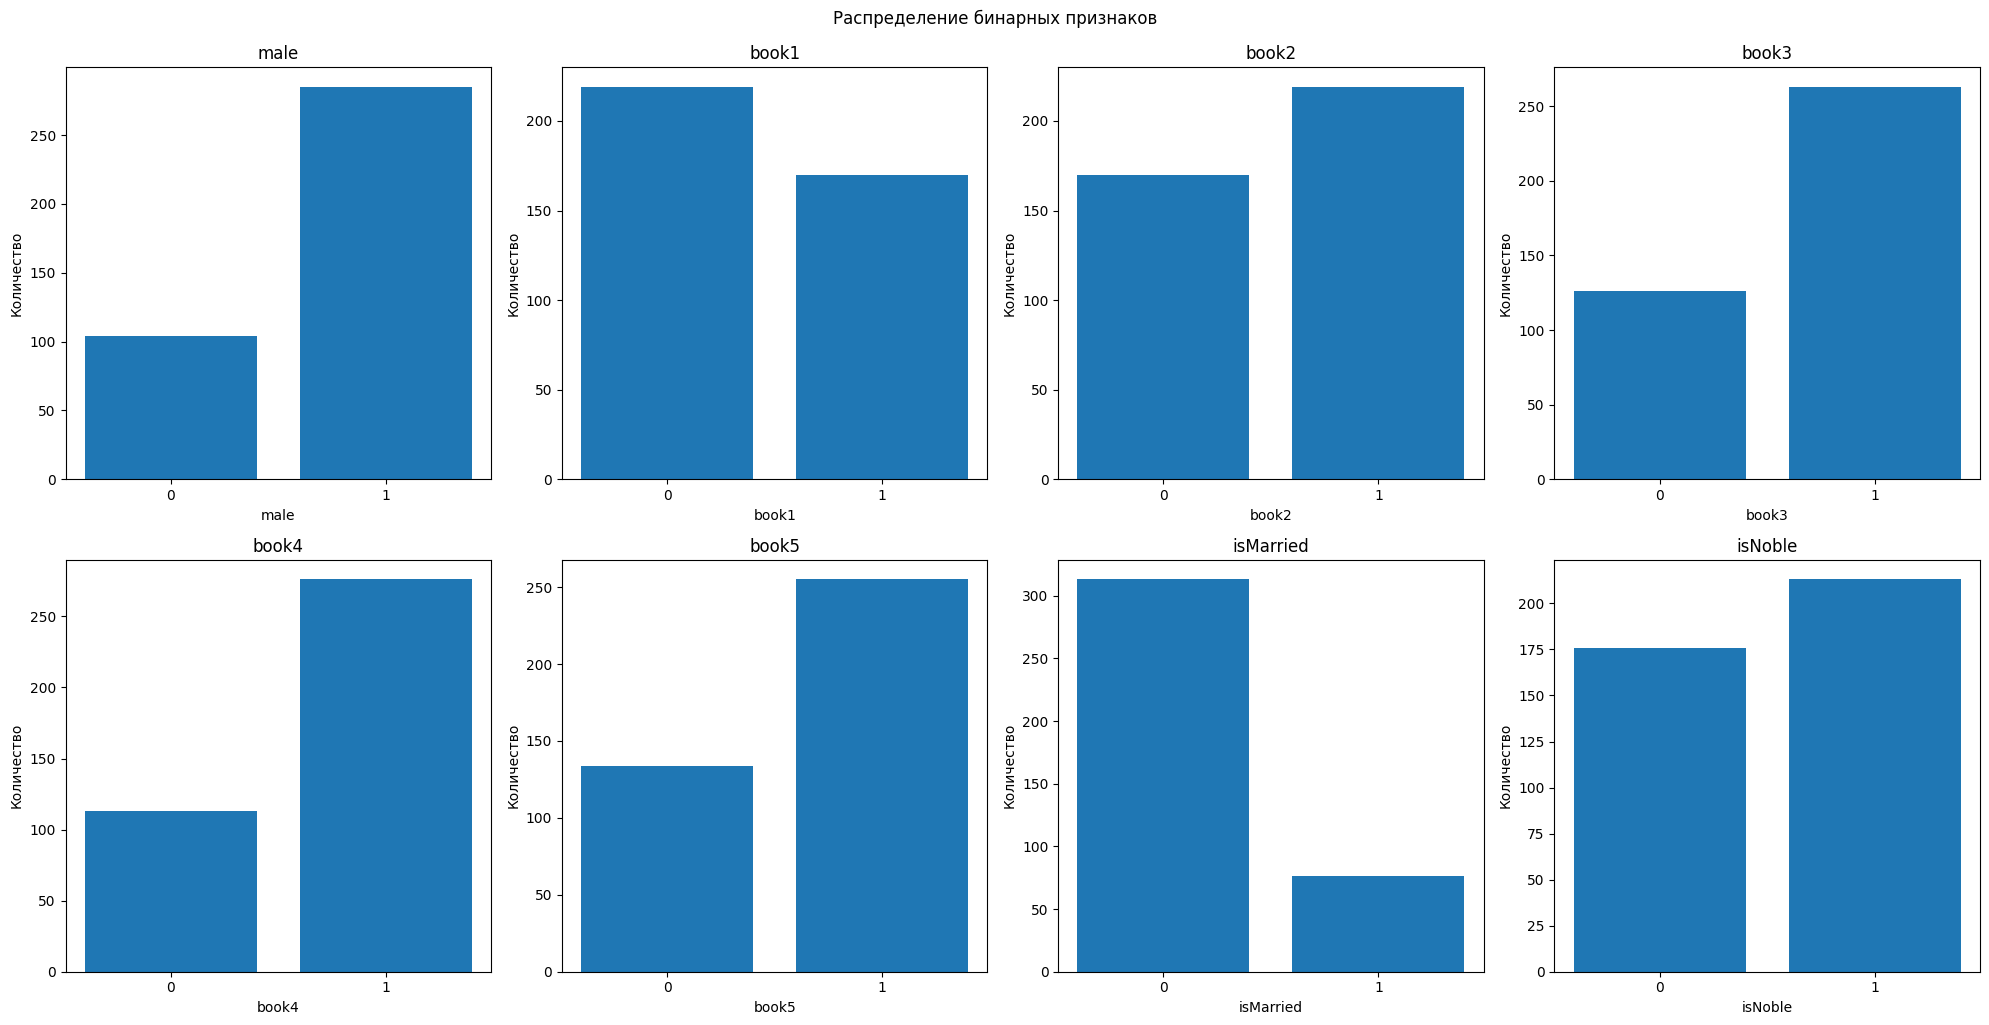

In [375]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for i, feature in enumerate(binary_features):
    counts_feature = data_test[feature].value_counts().sort_index()
    axes[i].bar(counts_feature.index, counts_feature.values)
    
    axes[i].set_title(f'{feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Количество')
    axes[i].set_xticks([0, 1])
    axes[i].set_xticklabels([f'0', f'1'])

plt.tight_layout()
plt.suptitle('Распределение бинарных признаков', y=1.02)
plt.show()

# количество персонажей из 2, 3, 5 книг теперь перевешивает
# больше персонажей с isNoble=1

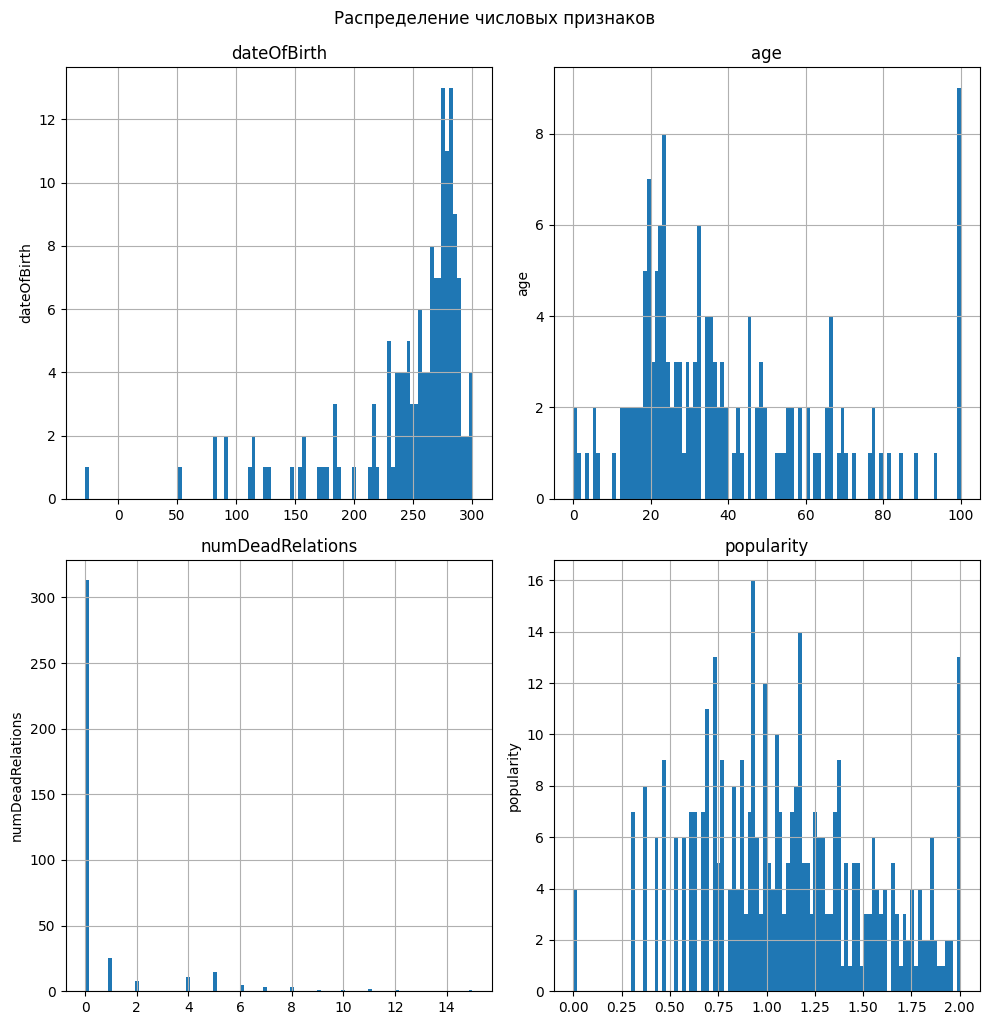

In [376]:
data_test['popularity'] = np.log10(data_test['popularity']*100+1)

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    data_test.hist(column=feature, bins=100, ax=axes[i])
    axes[i].set_title(f'{feature}')
    axes[i].set_ylabel(feature)

plt.tight_layout()
plt.suptitle('Распределение числовых признаков', y=1.02)
plt.show()

# больше разброс значений dateOfBirth и age
# popularity больше похож на нормальное распределение, а в тренировочной выборке оно было смещено влево

Преобразуйте признаки в тестовом датасете по тому же пайплайну, как вы преобразовывали обучающие данные. Примените вашу лучшую модель на тестовом датасете для получения прогноза целевой переменной `isAlive`

In [377]:
# заполняем пропуски медианой из трейна
data_test['age'] = data_test['age'].fillna(data['age'].median())
data_test['dateOfBirth'] = data_test['dateOfBirth'].fillna(data['dateOfBirth'].median())

# Заполняем пропуски isAliveMother, isAliveFather, isAliveHeir, isAliveSpouse средним из трейна
binary_cols = ['isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse']
for col in binary_cols:
    data_test[col] = data_test[col].fillna(data[col].mean())

# формируем признак culture_target
data_test['culture_grouped'] = data_test['culture'].str.lower().map(cultures_grouped_inverted)
data_test['culture_grouped'] = data_test['culture_grouped'].fillna('culture_no_data')
data_test.loc[(~data_test['culture_grouped'].isin(culture_target.index)), 'house'] = 'culture_no_data'
data_test = data_test.drop('culture', axis=1)
data_test['culture_target'] = data_test['culture_grouped'].map(culture_target)

# формируем признак title_target
data_test['title'] = data_test['title'].fillna('Other')
data_test.loc[(~data_test['title'].isin(other_titles)), 'title'] = 'Other'
data_test['title'] = data_test['title'].replace(other_titles, 'Other')
data_test['title_target'] = data_test['title'].map(title_target)

# формируем признак house_target
data_test['house'] = data_test['house'].fillna('No house')
data_test.loc[(~data_test['house'].isin(house_target.index)), 'house'] = 'No house'
data_test['house_target'] = data_test['house'].map(house_target)

# дропаем ненужное
data_test = data_test.drop(['house', 'culture_grouped', 'title'], axis=1)
data_test = data_test.drop(['mother', 'father', 'heir', 'spouse', 'name'], axis=1)

data_test.head()

,male,dateOfBirth,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,culture_target,title_target,house_target
S.No,,,,,,,,,,,,,,,,,,,
1558,0,156.0,0,0,0,0,1,0.501927,0.496146,0.502248,0.537251,0,0,100.0,0,0.779360,0.781104,0.791465,0.000000
1559,0,272.0,0,1,1,1,1,0.501927,0.496146,0.502248,0.537251,0,0,24.0,0,1.878418,0.834862,0.791465,1.000000
1560,0,272.0,0,0,1,1,0,0.501927,0.496146,0.502248,0.537251,0,0,24.0,0,0.301756,0.781104,0.791465,0.750000
1561,1,272.0,1,1,1,1,1,0.501927,0.496146,0.502248,0.537251,0,1,24.0,0,1.363115,0.781104,0.791465,0.803150
1562,1,262.0,1,1,1,1,1,0.501927,0.496146,0.502248,1.000000,1,0,38.0,0,1.648148,0.700000,0.791465,0.898876


In [378]:
estimators = [
    ('gb', grid_search_gb.best_estimator_),
    ('ada', grid_search_ada.best_estimator_),
    ('rf', grid_search_rf.best_estimator_)
]

final_model = VotingClassifier(
    estimators=estimators,
    voting='hard'
)

final_model.fit(X, y)
y_pred = final_model.predict(data_test)

c:\Users\katsk\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [379]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

"gdown" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.


In [381]:
submission = pd.read_csv('content/submission.csv', index_col='S.No')

In [382]:
submission['isAlive'] = y_pred

submission

,isAlive
S.No,
1558,0
1559,1
1560,1
1561,1
1562,1
...,...
1942,1
1943,1
1944,1


Как сохранить измененный Pandas DataFrame в csv файл:

In [383]:
submission.to_csv("content/new_submission.csv", index=False)